# Elipse de confianza para $\boldsymbol{\mu}$ de una $N_2(\boldsymbol{\mu}, \boldsymbol{\Sigma})$

<img src="https://raw.githubusercontent.com/fhernanb/fhernanb.github.io/master/docs/logo_unal_color.png" alt="drawing" width="200"/>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Los datos usados aquí fueron tomados del ejemplo 5.3 de Johnson & Wichern.

In [2]:
dt = pd.read_table("table_4-1_and_4-5.txt", sep="\t")  # Los datos están en table_4-1_and_4-5.txt
dt = dt**0.25  # Para transformar los datos según el libro
dt.head()      # Para ver el inicio de los datos

,rad_closed,rad_open
0,0.622333,0.740083
1,0.547723,0.547723
2,0.651356,0.740083
3,0.562341,0.562341
4,0.472871,0.562341


Para conocer las dimensiones de `dt` usamos:

In [3]:
dt.shape

(42, 2)

Para calcular el vector de medias muestral $\bar{\boldsymbol{X}}$ y la matriz de covarianzas $\boldsymbol{S}$:

In [4]:
print('Vector de medias \n')
medias = dt.mean()
print(medias)

print('\n')
print('Matriz de covarianzas \n')
sigma = dt.cov()
print(sigma)

Vector de medias 

rad_closed    0.564258
rad_open      0.602981
dtype: float64


Matriz de covarianzas 

            rad_closed  rad_open
rad_closed    0.014350  0.011715
rad_open      0.011715  0.014545


Para dibujar las observaciones en $\Re^2$ y agregando el vector de medias $\bar{\boldsymbol{X}}$ usamos:

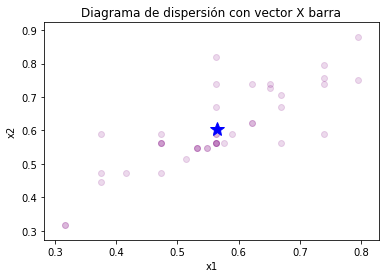

In [5]:
plt.scatter(x=dt.rad_closed, y=dt.rad_open, color='purple', alpha=0.15)
plt.plot(medias[0], medias[1], color='blue', marker='*', markersize=15)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Diagrama de dispersión con vector X barra');

La siguiente función es una modificación de la función propuesta por [Syrtis Major](https://stackoverflow.com/users/2144720/syrtis-major)

In [6]:
from scipy.stats import f

def conf_ellipse(cov, q=None, n=None, **kwargs):
    """
    Parameters
    ----------
    cov : (2, 2) array Covariance matrix.
    q : float, optional. Confidence level, should be in (0, 1)
    n : number of observations in the sample

    Returns
    -------
    width, height, rotation :
         The lengths of two axises and the rotation angle in degree
    for the ellipse.
    """
    radius2 = 2 * (n-1) * f.ppf(q, 2, n-2) / (n * (n-2))
    
    val, vec = np.linalg.eigh(cov)
    width, height = 2 * (val[:, None] * radius2)**0.5
    rotation = np.degrees(np.arctan2(*vec[::-1, 0]))

    return width, height, rotation

A continuación la información para construir la elipse de 95% de confianza y se almacena en el objeto `elip_95`

In [7]:
elip_95 = conf_ellipse(cov=sigma, q=0.95, n=42)

Para crear la elipse se usa la función `Ellipse`

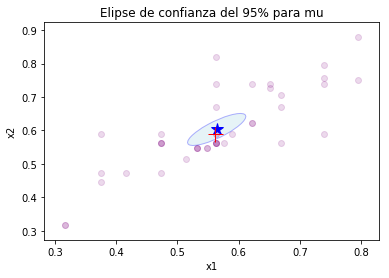

In [8]:
from matplotlib.patches import Ellipse

elipse = Ellipse(xy=medias, width=elip_95[0], height=elip_95[1], angle=elip_95[2], color='blue')
elipse.set_facecolor('lightblue')
elipse.set_alpha(0.3)

ax = plt.subplot(111)
plt.scatter(x=dt.rad_closed, y=dt.rad_open, color='purple', alpha=0.15)
plt.plot(medias[0], medias[1], color='blue', marker='*', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Elipse de confianza del 95% para mu')
ax.add_artist(elipse)  # Para agregar la elipse
plt.plot(0.562, 0.589, color='red', marker='+', markersize=15);

Para replicar la figura 5.1 del Johnson y Wichern usamos

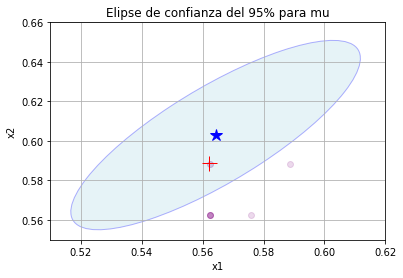

In [9]:
elipse = Ellipse(xy=medias, width=elip_95[0], height=elip_95[1], angle=elip_95[2], color='blue')
elipse.set_facecolor('lightblue')
elipse.set_alpha(0.3)

ax = plt.subplot(111)
plt.scatter(x=dt.rad_closed, y=dt.rad_open, color='purple', alpha=0.15)
plt.plot(medias[0], medias[1], color='blue', marker='*', markersize=12)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Elipse de confianza del 95% para mu')
ax.add_artist(elipse)  # Para agregar la elipse
plt.xlim((0.51, 0.62))
plt.ylim((0.55, 0.66))
plt.grid()
plt.plot(0.562, 0.589, color='red', marker='+', markersize=15);

<div class="alert alert-success">
Como el vector $\boldsymbol{\mu}_0=(0.562, 0.589)^\top$ está __dentro__ de la elipse de confianza del 95%, no podemos rechazar $H_0$ cuando constrastamos $H_0: \boldsymbol{\mu}=\boldsymbol{\mu}_0$ frente a $H_1:\boldsymbol{\mu} \neq \boldsymbol{\mu}_0$.
</div>

<div class="alert alert-info">
  <strong>Tarea</strong>  
  - Replicar este mismo ejemplo con R.  
  - ¿Qué sucede con la elipse cuando $n$ cambia de 42 a 84 (se duplica el tamaño de muestra)?
</div>